In [11]:
import pandas as pd
from pandas import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

import warnings
warnings.filterwarnings("ignore")

# Ice Cream Production Data

In [12]:
#read data
df_ice_cream = pd.read_csv('ice_cream.csv')

In [13]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [14]:
#rename columns
df_ice_cream.rename(columns={'DATE':'date', 'IPN31152N':'production'}, inplace=True)

In [15]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [16]:
#set date as index
df_ice_cream.set_index('date', inplace=True)

In [17]:
#just get data from 2010 onwards
start_date = pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [18]:
#show result
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


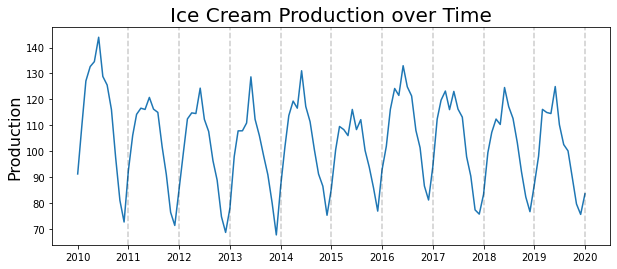

In [19]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)
for year in range(2011,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

# ACF

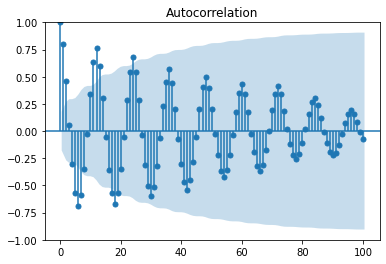

In [20]:
acf_plot = plot_acf(df_ice_cream.production, lags=100)

### Based on decaying ACF, we are likely dealing with an Auto Regressive process

# PACF

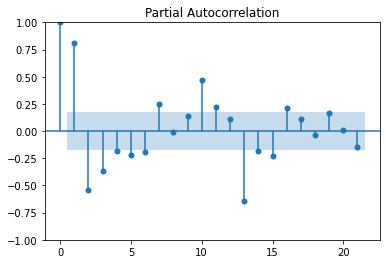

In [21]:
pacf_plot = plot_pacf(df_ice_cream.production)

### Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

In [22]:
# Get training and testing sets
train_end = datetime(2018,12,1)
test_end = datetime(2019,12,1)

train_data = df_ice_cream[:train_end]
test_data = df_ice_cream[train_end + timedelta(days=1):test_end]

In [43]:
train_data

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2018-08-01,112.6779
2018-09-01,103.3118
2018-10-01,92.1321


In [42]:
test_data

,production
date,
2019-01-01,86.9988
2019-02-01,98.1116
2019-03-01,116.1718
2019-04-01,114.9703
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,100.1741


In [23]:
# infer frequency, not necessary here
# df_ice_cream = df_ice_cream.asfreq(pd.infer_freq(df_ice_cream.index))

In [24]:
df_ice_cream

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [46]:
# Fit the AR Model with lags(p,0), MA part stays 0

model = ARIMA(train_data,order=(13,0,0))
model_fit = model.fit()
model_fit.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:                ARIMA(13, 0, 0)   Log Likelihood                -309.151
Date:                Thu, 27 Oct 2022   AIC                            648.303
Time:                        12:07:14   BIC                            688.535
Sample:                    01-01-2010   HQIC                           664.615
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.9878      1.633     63.660      0.000     100.786     107.189
ar.L1          0.8838      0.080     11.048      0.000       0.727       1.041
ar.L2          0.0283      0.115      0.245      0.806      -0.198       0.255
ar.L3         -0.2151      0.100     -2.143      0.032      -0.412      -0.018
ar.L4          0.0888      0.118      0.755      0.450      -0.142       0.319
ar.L5          0.0887      0.136      0.651      0.515      -0.178       0.355
ar.L6         -0.2727      0.112     -2.433      0.015      -0.492      -0.053
ar.L7          0.1078      0.117      0.922      0.357      -0.121       0.337
ar.L8          0.0624      0.133      0.471      0.638      -0.197       0.322
ar.L9         -0.2212      0.102     -2.170      0.030      -0.421      -0.021
ar.L10         0.1240      0.105      1.179      0.238      -0.082       0.330
ar.L11         0.0852      0.120      0.708      0.479      -0.151       0.321
ar.L12         0.6184      0.108      5.725      0.000       0.407       0.830
ar.L13        -0.6445      0.077     -8.338      0.000      -0.796      -0.493
sigma2        15.3613      2.707      5.674      0.000      10.055      20.667
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):                 2.53
Prob(Q):                              0.34   Prob(JB):                         0.28
Heteroskedasticity (H):               0.80   Skew:                             0.36
Prob(H) (two-sided):                  0.52   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
# exclude lag 2
from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(train_data, lags=[1,3])
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:             production   No. Observations:                  108
Model:              Restr. AutoReg(3)   Log Likelihood                -361.928
Method:               Conditional MLE   S.D. of innovations              7.599
Date:                Tue, 18 Oct 2022   AIC                            731.856
Time:                        11:18:40   BIC                            742.472
Sample:                    04-01-2010   HQIC                           736.158
                         - 12-01-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            42.1231      5.419      7.773      0.000      31.501      52.745
production.L1     1.0098      0.049     20.505      0.000       0.913       1.106
production.L3    -0.4169      0.050     -8.406      0.000      -0.514      -0.320
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9583           -0.5771j            1.1187           -0.0863
AR.2            0.9583           +0.5771j            1.1187            0.0863
AR.3           -1.9166           -0.0000j            1.9166           -0.5000
-----------------------------------------------------------------------------
"""

In [37]:
# get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [47]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end = pred_end_date)
residuals = test_data["production"] - predictions

In [45]:
predictions

2019-01-01     81.236249
2019-02-01     90.140510
2019-03-01    101.523172
2019-04-01    111.164049
2019-05-01    117.060582
2019-06-01    118.125846
2019-07-01    115.033483
2019-08-01    109.355515
2019-09-01    103.142077
2019-10-01     98.184812
2019-11-01     95.616387
2019-12-01     95.699737
Freq: MS, Name: predicted_mean, dtype: float64

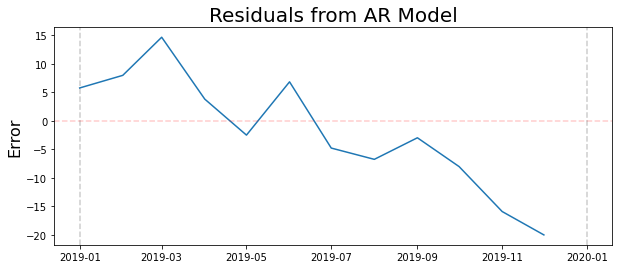

In [39]:
# Plot Residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model',fontsize=20)
plt.ylabel('Error',fontsize=16)
plt.axhline(0,color='r',linestyle='--',alpha=0.2)
for year in range(2019,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)




Text(0, 0.5, 'production')

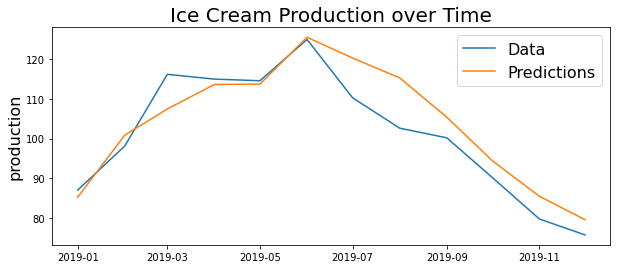

In [48]:
# Plot prediction
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data','Predictions'),fontsize=16)
plt.title('Ice Cream Production over Time',fontsize=20)
plt.ylabel('production',fontsize=16)



In [41]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(residuals/test_data["production"])),4))
print('Root Mean Square Error:', round(np.sqrt(np.mean(residuals**2)),4))

Mean Absolute Percentage Error: 0.0895
Root Mean Square Error: 9.8842


In [49]:
print('Mean Absolute Percentage Error:', round(np.mean(abs(residuals/test_data["production"])),4))
print('Root Mean Square Error:', round(np.sqrt(np.mean(residuals**2)),4))

Mean Absolute Percentage Error: 0.0486
Root Mean Square Error: 6.0779
